In [1]:
##Python Counter class
##Anagram checker
from collections import Counter

In [2]:
def is_anagram(word1,word2):
    """Checks whether the words are anagrams.

    word1: string
    word2: string

    returns: boolean
    """
    return Counter(word1)==Counter(word2)

In [3]:
print(is_anagram('tachymetric','mccarthyite'))
print(is_anagram('banana','peach'))

True
False


In [8]:
class Multiset(Counter):
    """A multiset is a set where elements can appear more than once."""

    def is_subset(self,other):
        """Checks whether self is a subset of other.

        other: Multiset

        returns: boolean
        """
        for char,count in self.items():
            if other[char] < count:
                return False
            return True
    
    # map the <= operator to is_subset
    __le__=is_subset
    
def can_spell(word,tiles):
    """Checks whether a set of tiles can spell a word.

    word: string
    tiles: string

    returns: boolean
    """
    return Multiset(word) <= Multiset(tiles)

print(can_spell('SYZYGY','AGSYYYZ'))

True


In [10]:
class Pmf(Counter):
    '''A Counter with probabilities.'''
    
    def normalize(self):
        """Normalizes the PMF so the probabilities add to 1."""
        total = float(sum(self.values()))
        for key in self:
            self[key]/=total
            
            
    def __add__(self,other):
        """Adds two distributions.

        The result is the distribution of sums of values from the
        two distributions.

        other: Pmf

        returns: new Pmf
        """
        pmf = Pmf()
        for key1,prob1 in self.items():
            for key2,prob2 in other.items():
                pmf[key1+key2]+=prob1*prob2
        return pmf        
    
    def __hash__(self):
        """Returns an integer hash value."""
        return id(self)
    
    def __eq__(self,other):
        return self is other
    
    def render(self):
        """Returns values and their probabilities, suitable for plotting."""
        return zip(*sorted(self.items()))

In [11]:
d6 = Pmf([1,2,3,4,5,6])
d6.normalize()
d6.name='one die'
print(d6)

Pmf({1: 0.16666666666666666, 2: 0.16666666666666666, 3: 0.16666666666666666, 4: 0.16666666666666666, 5: 0.16666666666666666, 6: 0.16666666666666666})


In [12]:
d6_twice = d6 + d6
d6_twice.name = 'two dice'

for key,prob in d6_twice.items():
    print(key,prob)

2 0.027777777777777776
3 0.05555555555555555
4 0.08333333333333333
5 0.1111111111111111
6 0.1388888888888889
7 0.16666666666666669
8 0.1388888888888889
9 0.1111111111111111
10 0.08333333333333333
11 0.05555555555555555
12 0.027777777777777776


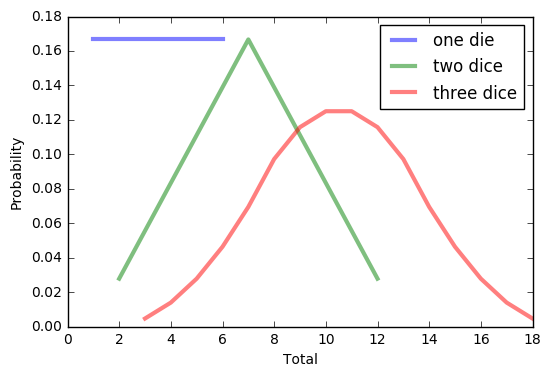

In [15]:
import matplotlib.pyplot as plt
pmf_ident = Pmf([0])
d6_thrice=sum([d6]*3,pmf_ident)
d6_thrice.name='three dice'

for die in [d6,d6_twice,d6_thrice]:
    xs,ys=die.render()
    plt.plot(xs,ys,label=die.name,linewidth=3,alpha=0.5)
    
plt.xlabel('Total')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [16]:
#Bayesian statistics
class Suite(Pmf):
    """Map from hypothesis to probability."""
    
    def bayesian_update(self,data):
        """Performs a Bayesian update.
        
        Note: called bayesian_update to avoid overriding dict.update

        data: result of a die roll
        """
        for hypo in self:
            like = self.likelihood(data,hypo)
            self[hypo] *= like
            
        self.normalize()    

In [18]:
def make_die(num_sides):
    die =Pmf(range(1,num_sides+1))
    die.name = 'd%d' % num_sides
    die.normalize()
    return die

dice = [make_die(x) for x in [4,6,8,12,20]]
print(dice)

[Pmf({1: 0.25, 2: 0.25, 3: 0.25, 4: 0.25}), Pmf({1: 0.16666666666666666, 2: 0.16666666666666666, 3: 0.16666666666666666, 4: 0.16666666666666666, 5: 0.16666666666666666, 6: 0.16666666666666666}), Pmf({1: 0.125, 2: 0.125, 3: 0.125, 4: 0.125, 5: 0.125, 6: 0.125, 7: 0.125, 8: 0.125}), Pmf({1: 0.08333333333333333, 2: 0.08333333333333333, 3: 0.08333333333333333, 4: 0.08333333333333333, 5: 0.08333333333333333, 6: 0.08333333333333333, 7: 0.08333333333333333, 8: 0.08333333333333333, 9: 0.08333333333333333, 10: 0.08333333333333333, 11: 0.08333333333333333, 12: 0.08333333333333333}), Pmf({1: 0.05, 2: 0.05, 3: 0.05, 4: 0.05, 5: 0.05, 6: 0.05, 7: 0.05, 8: 0.05, 9: 0.05, 10: 0.05, 11: 0.05, 12: 0.05, 13: 0.05, 14: 0.05, 15: 0.05, 16: 0.05, 17: 0.05, 18: 0.05, 19: 0.05, 20: 0.05})]


In [20]:
class DiceSuite(Suite):
    def likelihood(self,data,hypo):
        """Computes the likelihood of the data under the hypothesis.

        data: result of a die roll
        hypo: Die object
        """
        return hypo[data]

In [21]:
dice_suite = DiceSuite(dice)
dice_suite.bayesian_update(6)

for die,prob in dice_suite.items():
    print(die.name)
    print(prob)

d4
0.0
d6
0.39215686274509803
d20
0.11764705882352942
d8
0.29411764705882354
d12
0.19607843137254902


In [22]:
dice_suite.bayesian_update(8)

for die, prob in dice_suite.items():
    print(die.name)
    print(prob)


d4
0.0
d6
0.0
d20
0.09972299168975071
d8
0.6232686980609419
d12
0.27700831024930744
